# Zillow Prize: Zillow’s Home Value Prediction (Zestimate)
## Can you improve the algorithm that changed the world of real estate?

## Description
Zillow's "Zestimates" are estimated home values based on numerous categorical and numerical features of a given property. Zillow has been able to improve the median margin of error from 14% at the Zestimate's release to 5% as of 2017. However, they have introduced a competition to Data Scientists to further improve the accuracy of the Zestimate. The goal of this project is to produce a model that more accurately predicts the future sale prices of homes than the current Zestimate algorithm. Success is measured by minimizing the log-error between the Zestimate and the actual sale price of the property. The log-error is defined as:
  
           logerror = log(Zestimate) - log(SalePrice)

We have been provided data on a variety of different features of Los Angeles-area homes sold in the year 2016. Some of these features are numerical and some are categorical. We will be using this data to build our model.

## Exploratory Data Analysis

### Import Libraries

In [8]:
import numpy as np 
import os
import pandas as pd
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Load and Examine the Data

In [2]:
# read in training and test data and labels
train_data = pd.read_csv('input/properties_2016.csv')
train_labels = pd.read_csv('input/train_2016_v2.csv')
test_data = pd.read_csv('input/properties_2017.csv')
test_labels = pd.read_csv('input/train_2017.csv')

# train_data = pd.read_csv('../input/properties_2016.csv')
# train_labels = pd.read_csv('../input/train_2016_v2.csv')
# test_data = pd.read_csv('../input/properties_2017.csv')
# test_labels = pd.read_csv('../input/train_2017.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The first step in our exploratory data analysis is to get a basic understanding of our dataset through a quick summary of what it contains.

In [3]:
train_data.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,...,2647.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,...,278.296562,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,...,369.731508,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,4.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000e+00,3.000000e+00,4.000000,7.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.250000,3.000000e+00,4.000000e+00,4.000000,7.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,1.968890e+05,4.880000e+05,2.015000e+03,3.069180e+05,6.201005e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,2.000000e+01,2.000000e+01,5.000000,1.200000e+01,2.000000e+01,66.0,...,6141.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,99.000000,4.830301e+14


This summary shows that there are 53 different variables provided in our dataset. The first thing that stands out is the first row of the table returned by the describe() function - *count*. This refers to the number of values in the dataset for that respective column. There are just under 3 million parcelid's, which uniquely identify properties (our observations). However, most of the features of our properties do not have a similar number for *count*. This means that we are missing data for many different features for many different observations. We will take a closer examination of the missing data later on.

The second thing that stands out is that there are numeric values representing categorical features. For example, the column *decktypeid* represents the type of deck of a property. The number assigned to the type of deck does not measure magnitude and could have been arbitrary. 

Finally, we should note that the mean of the majority of the truly numeric (and not representing categorical) features is greater than the median. This means that our features have a positive skew.

Now that we have some general context to our dataset, we can look at the data itself.

In [4]:
train_labels.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


The training labels dataset consists of three different columns. *parcelids* identifies individual homes. *logerror* is the difference between the log of Zillow's estimated selling price and the log of the home's actual selling price. And *transactiondate* is the date the home sold.

In [5]:
train_data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


## Examine Missing Data

By looking at some example observations of our training data, we can confirm that lots of observations lack complete data. We can further understand the extent of these missing values through a visualization.

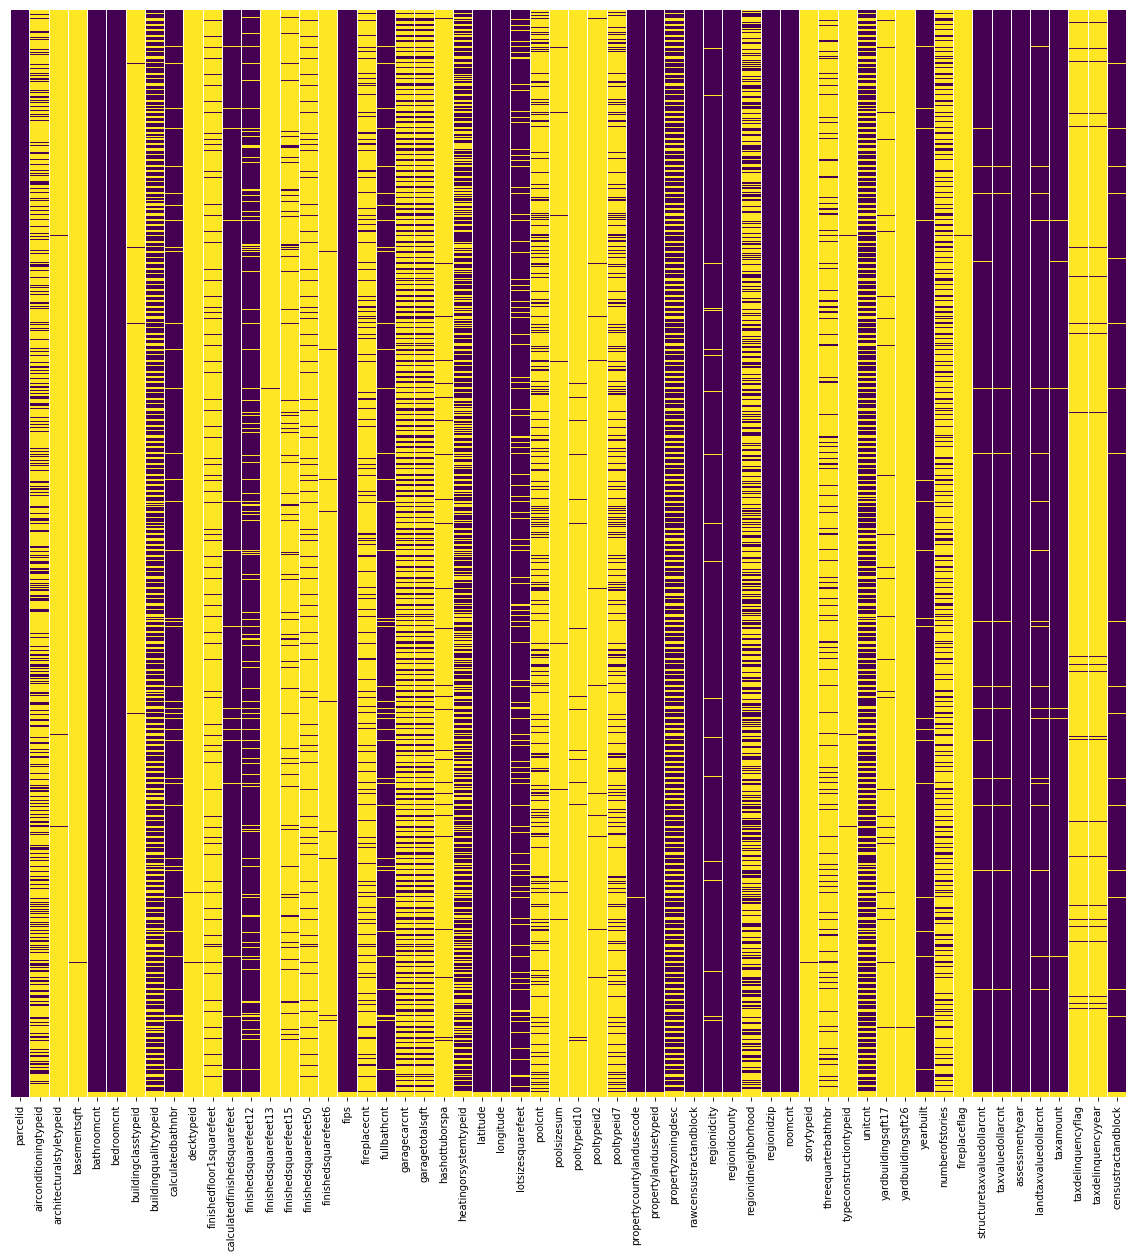

In [13]:
plt.figure(figsize=(20,20))

sns.heatmap(
    train_data.isnull(),
    cbar=False,
    yticklabels=False,
    cmap = 'viridis'
)

This heatmap visualizes whether the training data has missing values. The yellow sections of the chart indicate missing data. This confirms our impression that there is missing data for many of the features. To further understand the extent of missing data, we can calculate the percentage of missing observations by feature.

In [ ]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = round((train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False), 4)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name = 'Feature'

missing_data

We are missing data for almost all observations for seventeen features. This is unfortunate because some of these variables contain information about potentially impactful features of the value of properties, such as the architecture style, and the size of the basement and pool.

## Correlations Between Dependent and Independent Variables

The next step of our Exploratory Data Analysis is to find correlations between our dependent and independent variables. This will help us identify instances of potential multicollinearity within our independent variables. It will also help us identify features that change with logerror.

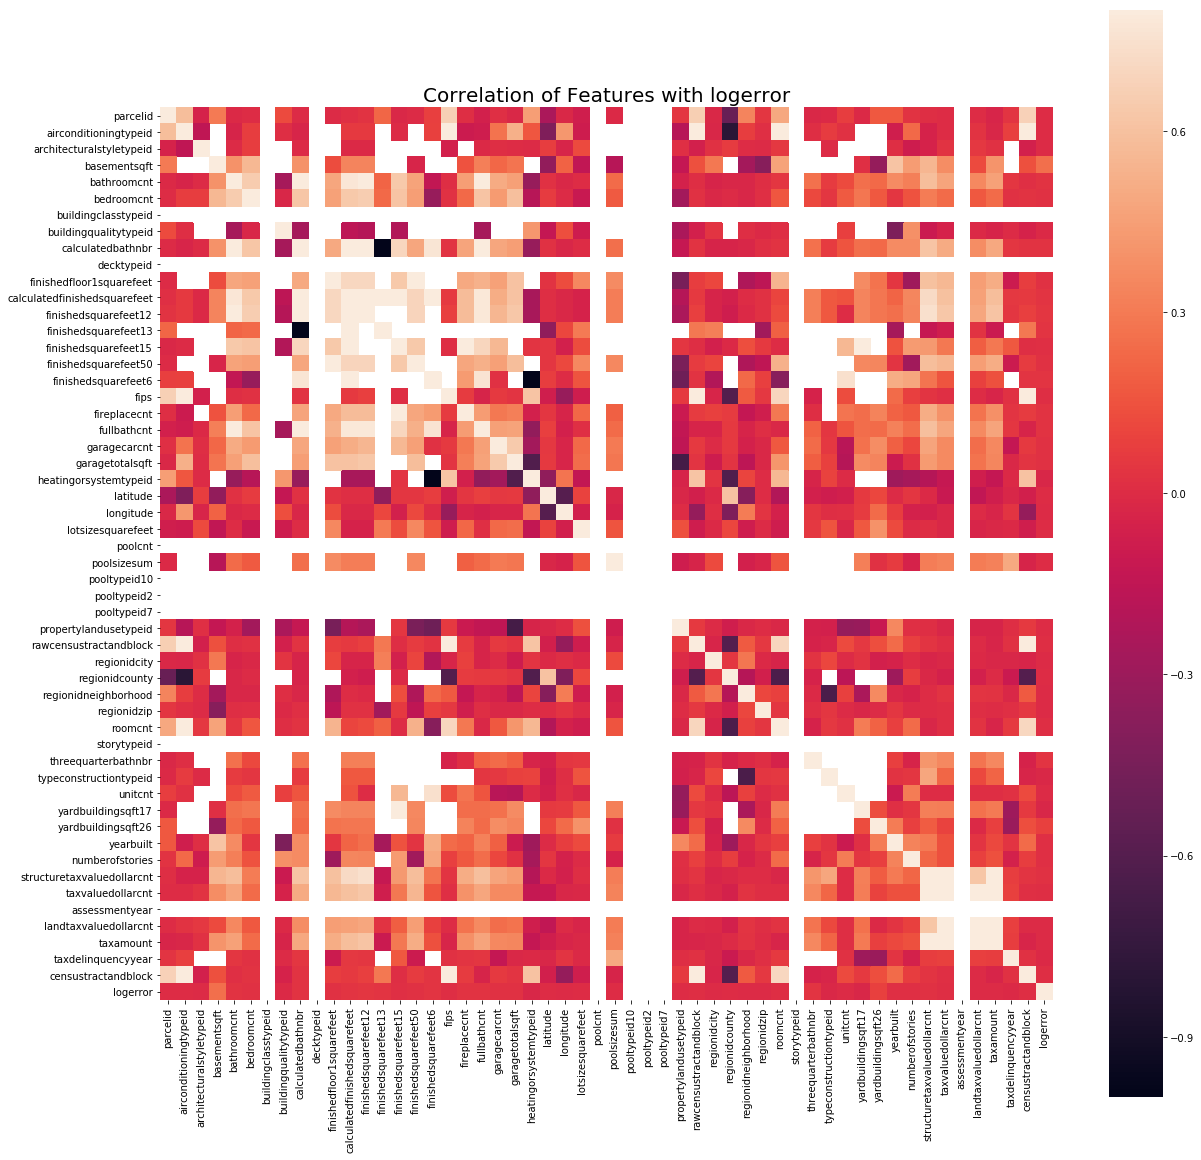

In [18]:
train_data_labels = pd.merge(train_data, train_labels, on='parcelid')

correlation = train_data_labels.corr()

plt.figure(figsize=(20,20))
plt.title('Correlation of Features with logerror',y=1,size=20)

sns.heatmap(
    correlation,
    square=True,
    vmax=0.8
)

Lighter squares on this heat map indicate that the variables are correlated. There are five squares that stick out. The first is between *calculatedfinishedsquarefeet* and *finishedsquarefeet12*. Both of these variables actually capture the same features of a home - the finished living area. 

Other lighter squares are *structuretaxvaluedollarcnt*, which measures the value of the structures on the property, *taxvaluedollarcnt*, which measures the value of the property, *landtaxvaluedollarcnt*, which measures the value of the land on the proeprty, and *taxamount*, which is the total tax assessed. 

Finally, we can visualize how a sample of these variables are correlated with *logerror* through pair plots. We are choosing to visualize features that are present for more than 90% of observations and are not some sort of numeric identifier. For example, although most properties contain *censustractandblock*, we are not including it in this visualization because it is census ID. This 90% cutoff is being used for this visualization but will not necessarily be adhered to for our model-building.

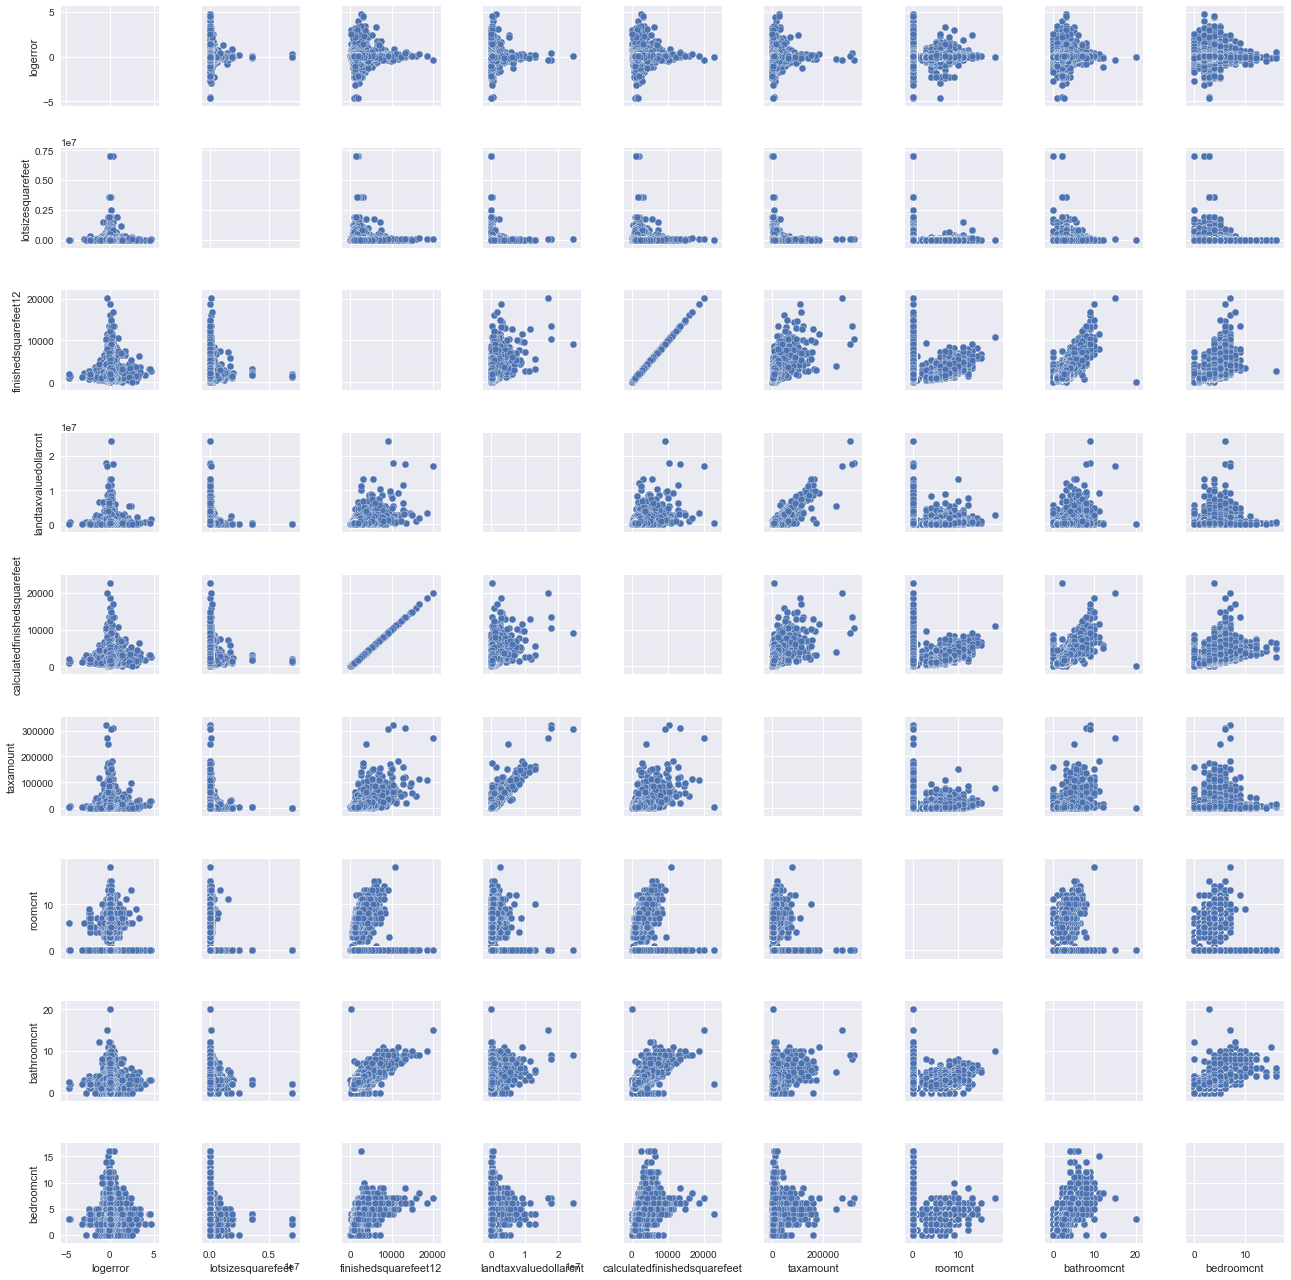

In [31]:
sns.set()

columns = [
    'logerror', 'lotsizesquarefeet', 'finishedsquarefeet12','landtaxvaluedollarcnt', 
    'calculatedfinishedsquarefeet', 'taxamount', 'roomcnt', 'bathroomcnt', 'bedroomcnt'
]

sns.pairplot(
    train_data_labels[columns], 
    size=2, 
    kind ='scatter', 
    diag_kind='kde'
)